# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'D:/Github/2nd-ML100Days/data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:/Github/2nd-ML100Days/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
label = ['0_Child', '1-2_Child', '3-5_Child', '>5_Child']

In [5]:
#1
"""
Your code here
"""
cut_rule = [min(app_train.CNT_CHILDREN)-1,min(app_train.CNT_CHILDREN),2,5,max(app_train.CNT_CHILDREN)]

#app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True,labels=label)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0_Child      215371
1-2_Child     87868
3-5_Child      4230
>5_Child         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
app_train.loc[:, ['AMT_INCOME_TOTAL','CNT_CHILDREN_GROUP','TARGET']].groupby(['CNT_CHILDREN_GROUP','TARGET']).mean()

AMT_INCOME_TOTAL
CNT_CHILDREN_GROUP TARGET                  
0_Child            0          166747.010980
                   1          160804.210548
1-2_Child          0          174590.584401
                   1          176115.362720
3-5_Child          0          175053.742913
                   1          160677.385714
>5_Child           0          139159.090909
                   1          180000.000000

In [7]:
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0_Child             0         166747.010980
                    1         160804.210548
1-2_Child           0         174590.584401
                    1         176115.362720
3-5_Child           0         175053.742913
                    1         160677.385714
>5_Child            0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

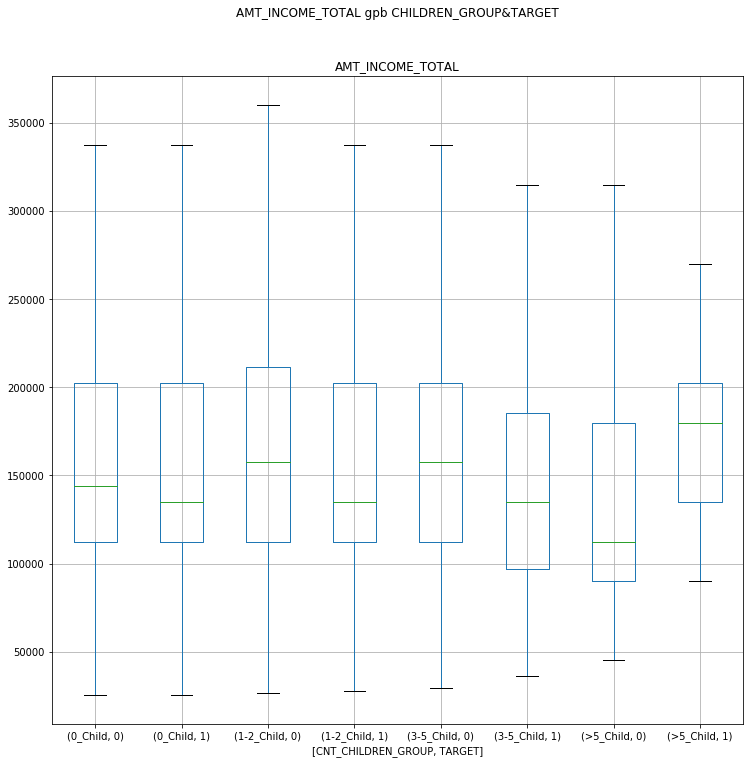

In [8]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL gpb CHILDREN_GROUP&TARGET')
plt.show()

In [9]:
#3
"""
Your code here
"""
#( value - np.mean(value) ) / ( np.std(value) )
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:  (x - np.mean(x)) / np.std(x))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136


In [14]:
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:  (x - np.mean(x)) / np.std(x))
app_train['Group_Mean'] = grouped_df.apply(lambda x: x - x + np.mean(x))
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET','CNT_CHILDREN_GROUP','TARGET','Group_Mean']].head(15)

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET,CNT_CHILDREN_GROUP,TARGET,Group_Mean
0,202500.000,0.491536,0_Child,1,160804.210548
1,270000.000,0.972437,0_Child,0,166747.010980
2,67500.000,-0.934708,0_Child,0,166747.010980
3,135000.000,-0.298993,0_Child,0,166747.010980
4,121500.000,-0.426136,0_Child,0,166747.010980
5,99000.000,-0.638041,0_Child,0,166747.010980
6,171000.000,-0.029872,1-2_Child,0,174590.584401
7,360000.000,1.820057,0_Child,0,166747.010980
8,112500.000,-0.510898,0_Child,0,166747.010980
9,135000.000,-0.298993,0_Child,0,166747.010980
